<a href="https://colab.research.google.com/github/sahilnagarkar36/DSML-lab-manual/blob/main/DSML_NO_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Read CSV File
df = pd. read_csv('/content/Mall_Customers.csv')
df. head ()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df. shape

(200, 5)

In [ ]:
df. describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
df.isna() .sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
df = df. set_index('CustomerID')
df. head ()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df. iloc[:,:4]
Y = df. index

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, train_size=0.75, random_state=123)
y_train.shape

(150,)

In [ ]:
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [ ]:
from sklearn.cluster import KMeans
import warnings
warnings. filterwarnings("ignore")

In [ ]:
df['Genre'] = df['Genre'].astype('category').cat.codes
df['Age'] = df['Age'].astype('category').cat.codes

In [ ]:
cluster =[]
for k in range (1,11):
  kmean=KMeans(n_clusters=k).fit(df)
  cluster.append(kmean.inertia_)

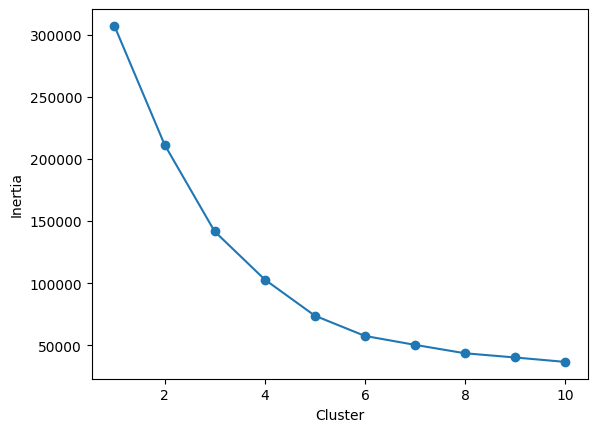

In [ ]:
plt. plot (range(1,11), cluster, marker="o" )
plt.xlabel ( 'Cluster')
plt. ylabel ('Inertia')
plt.show()

In [ ]:
km=KMeans(n_clusters=5).fit(df)
df[ 'Labels'] = km.labels_
df. head ()

,Genre,Age,Annual Income (k$),Spending Score (1-100),Labels
CustomerID,,,,,
1,1,1,15,39,3
2,1,3,15,81,0
3,0,2,16,6,3
4,0,5,16,77,0
5,0,13,17,40,3


In [ ]:
centers = np.array(km.cluster_centers_)

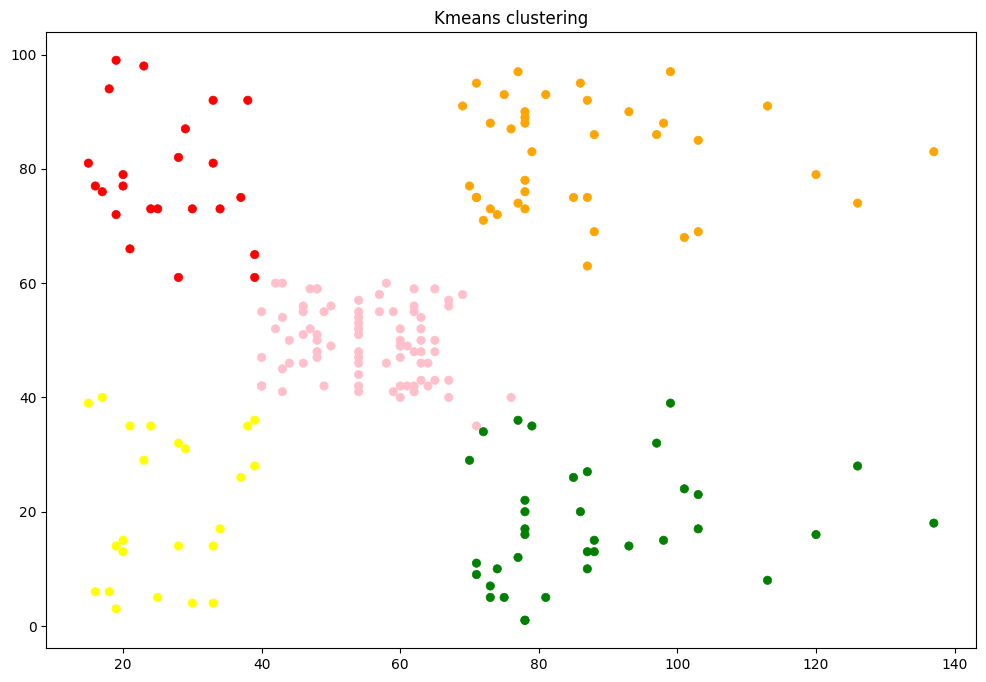

In [ ]:
colors = {0: 'red', 1: 'green', 2: 'orange', 3: 'yellow' ,4: 'pink'}
plt.figure(figsize=(12, 8))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], linewidths=0.5, color =df['Labels'].map(colors))
plt.title('Kmeans clustering')
plt. show()

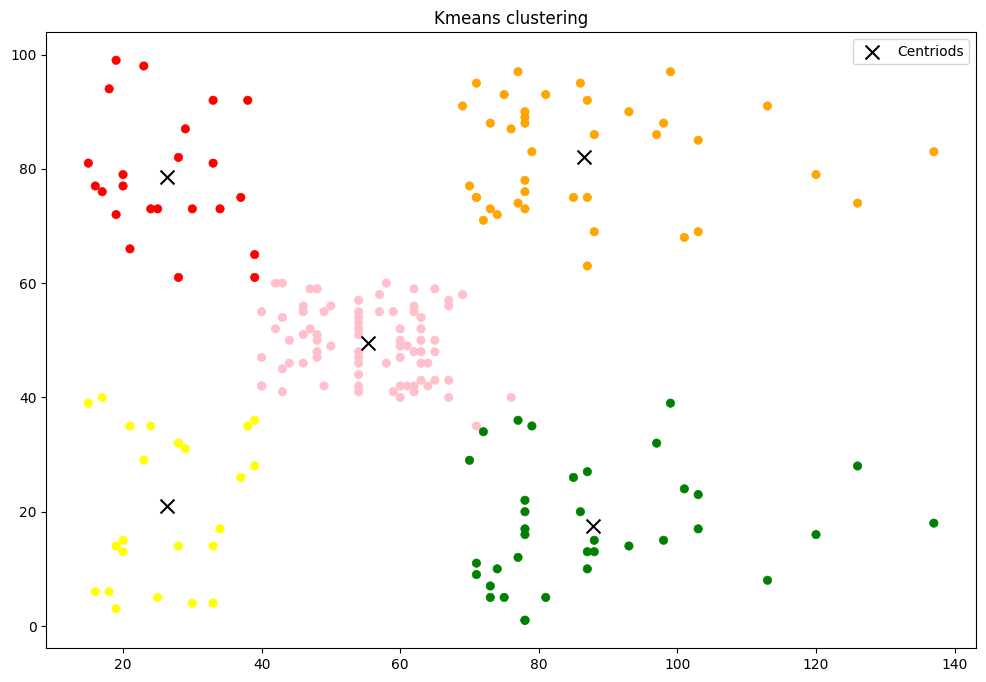

In [ ]:
colors = {0: 'red', 1: 'green', 2: 'orange',3: 'yellow' ,4:'pink'}
plt. figure(figsize=(12, 8))
plt.scatter(df[ 'Annual Income (k$)'], df['Spending Score (1-100)'], linewidths=0.5, color=df[ 'Labels']. map (colors) )
plt. scatter(km.cluster_centers_[:, 2], km.cluster_centers_[:, 3], s = 100, c = 'black', label='Centriods', marker='x')
plt.title('Kmeans clustering')
plt.legend()
plt. show()